In [1]:
# Dependencies
import json
import os
import requests
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from pprint import pprint
from config import weather_api_key
from scipy import stats
from scipy.stats import linregress

In [2]:
city_list = []
lat_list = []
long_list = []
temp_list = []
humid_list = []
cloud_list = []
wind_list = []
south_lat_list = []
north_lat_list = []
lat_lngs = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0

In [3]:
for x in range(1500):
    lat = random.uniform(-90 , 90)
    lng = random.uniform( -180 , 180)
    city = citipy.nearest_city(lat, lng)
    city_name = city.city_name
    country_list = city.country_code
    while city_name not in city_list:
        city_list.append(city_name)
len(city_list)

626

In [4]:
for city_name in city_list:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q="
        weather_json = requests.get(query_url + city_name).json()
        lat_list.append(weather_json["coord"]["lat"])
        long_list.append(weather_json['coord']['lon'])
        temp_list.append(weather_json["main"]["temp"])
        humid_list.append(weather_json["main"]["humidity"])
        cloud_list.append(weather_json["clouds"]["all"])
        wind_list.append(weather_json["wind"]["speed"])
        count = count +1
        print(f" Currently processing {count} city.Name of the city is {city_name}")
    except KeyError:
        lat_list.append(np.nan)
        long_list.append(np.nan)
        temp_list.append(np.nan)
        humid_list.append(np.nan)
        cloud_list.append(np.nan)
        wind_list.append(np.nan)
        count = count +1
        print(f" Currently processing {count} city.City not found {city_name}")     

 Currently processing 1 city.Name of the city is ribeira grande
 Currently processing 2 city.Name of the city is punta arenas
 Currently processing 3 city.Name of the city is wattegama
 Currently processing 4 city.Name of the city is ushuaia
 Currently processing 5 city.Name of the city is hobart
 Currently processing 6 city.Name of the city is hithadhoo
 Currently processing 7 city.Name of the city is bandrele
 Currently processing 8 city.Name of the city is new norfolk
 Currently processing 9 city.Name of the city is chuy
 Currently processing 10 city.Name of the city is lavrentiya
 Currently processing 11 city.Name of the city is sergeyevka
 Currently processing 12 city.City not found palabuhanratu
 Currently processing 13 city.Name of the city is mataura
 Currently processing 14 city.Name of the city is progreso
 Currently processing 15 city.Name of the city is meulaboh
 Currently processing 16 city.Name of the city is vaitape
 Currently processing 17 city.Name of the city is baiji

 Currently processing 139 city.Name of the city is vila velha
 Currently processing 140 city.Name of the city is ayorou
 Currently processing 141 city.Name of the city is valer
 Currently processing 142 city.City not found formoso do araguaia
 Currently processing 143 city.Name of the city is flin flon
 Currently processing 144 city.Name of the city is bondo
 Currently processing 145 city.Name of the city is batemans bay
 Currently processing 146 city.Name of the city is dingle
 Currently processing 147 city.Name of the city is yeniseysk
 Currently processing 148 city.Name of the city is beloha
 Currently processing 149 city.Name of the city is geraldton
 Currently processing 150 city.Name of the city is port-gentil
 Currently processing 151 city.Name of the city is georgetown
 Currently processing 152 city.Name of the city is benemerito de las americas
 Currently processing 153 city.Name of the city is bluff
 Currently processing 154 city.Name of the city is ibotirama
 Currently proce

 Currently processing 276 city.Name of the city is neiafu
 Currently processing 277 city.Name of the city is frontera
 Currently processing 278 city.Name of the city is faanui
 Currently processing 279 city.Name of the city is lagoa
 Currently processing 280 city.City not found pousat
 Currently processing 281 city.Name of the city is otane
 Currently processing 282 city.Name of the city is dubbo
 Currently processing 283 city.Name of the city is kungurtug
 Currently processing 284 city.City not found maghama
 Currently processing 285 city.Name of the city is cabo san lucas
 Currently processing 286 city.City not found samalaeulu
 Currently processing 287 city.City not found bolungarvik
 Currently processing 288 city.Name of the city is sorland
 Currently processing 289 city.Name of the city is triolet
 Currently processing 290 city.City not found nizhneyansk
 Currently processing 291 city.Name of the city is laishevo
 Currently processing 292 city.City not found karaul
 Currently proc

 Currently processing 414 city.City not found viligili
 Currently processing 415 city.Name of the city is maniitsoq
 Currently processing 416 city.Name of the city is kruisfontein
 Currently processing 417 city.Name of the city is yendi
 Currently processing 418 city.Name of the city is zhigansk
 Currently processing 419 city.Name of the city is road town
 Currently processing 420 city.Name of the city is balakhta
 Currently processing 421 city.Name of the city is mildura
 Currently processing 422 city.Name of the city is kachug
 Currently processing 423 city.Name of the city is san rafael
 Currently processing 424 city.Name of the city is lincoln
 Currently processing 425 city.City not found belushya guba
 Currently processing 426 city.Name of the city is wakema
 Currently processing 427 city.Name of the city is marienburg
 Currently processing 428 city.Name of the city is el vigia
 Currently processing 429 city.Name of the city is poladpur
 Currently processing 430 city.Name of the c

 Currently processing 552 city.Name of the city is drexel heights
 Currently processing 553 city.Name of the city is sikeston
 Currently processing 554 city.Name of the city is merrill
 Currently processing 555 city.Name of the city is kaeo
 Currently processing 556 city.Name of the city is mount isa
 Currently processing 557 city.City not found longlac
 Currently processing 558 city.Name of the city is goundam
 Currently processing 559 city.Name of the city is zhanakorgan
 Currently processing 560 city.Name of the city is saint-gaudens
 Currently processing 561 city.Name of the city is howard springs
 Currently processing 562 city.Name of the city is port lincoln
 Currently processing 563 city.Name of the city is oituz
 Currently processing 564 city.Name of the city is la rioja
 Currently processing 565 city.Name of the city is conceicao do araguaia
 Currently processing 566 city.Name of the city is college
 Currently processing 567 city.Name of the city is sampit
 Currently processin

In [5]:
#Create a dataframe 
city_data_df = pd.DataFrame({'City': city_list,
                             'Latitude': lat_list,
                            'Longitude': long_list,
                            'Temperature': temp_list,
                            'Humidity': humid_list,
                            'Cloudiness': cloud_list,
                            'Wind Speed': wind_list})

#Save dataframe as csv
city_data_df =city_data_df.dropna()
city_data_df.to_csv("Output_csv_files/city_data.csv", encoding="utf-8", index=False)
city_data_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,ribeira grande,38.52,-28.70,61.54,73.0,97.0,4.70
1,punta arenas,-53.15,-70.92,41.00,80.0,20.0,13.87
2,wattegama,6.80,81.48,84.13,62.0,1.0,4.97
3,ushuaia,-54.80,-68.30,41.00,81.0,20.0,5.82
4,hobart,-42.88,147.33,53.69,58.0,75.0,20.80
...,...,...,...,...,...,...,...
621,mehamn,71.04,27.85,26.74,89.0,99.0,14.81
622,mogadishu,2.04,45.34,83.37,71.0,0.0,7.56
623,alice springs,-23.70,133.88,80.60,18.0,16.0,10.29
624,hegang,47.40,130.37,47.23,43.0,16.0,9.22


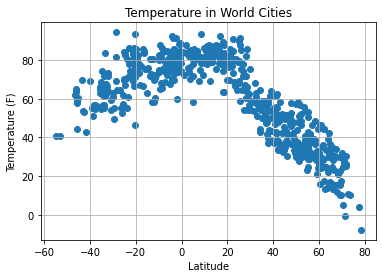

In [6]:
# Build a scatter plot for each data type Temperature (F) vs. Latitude
plt.scatter(city_data_df["Latitude"], city_data_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/TemperatureVsLatitude.png")

# Show plot
plt.show()

## Analysis:
The above plot is comparing temperatures to latitude for multiple cities. Temperature is inversely related to latitude. As latitude increases, the temperature falls, and vice versa.

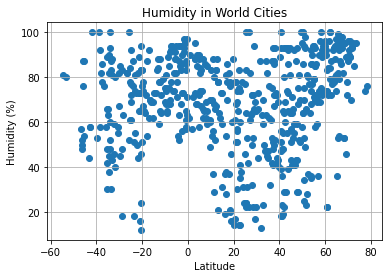

In [7]:
# Build a scatter plot for each data type Humidity (%) vs. Latitude
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/HumidityVsLatitude.png")

# Show plot
plt.show()

## Analysis:
The above plot is comparing humidity to latitude for multiple cities. There is no relation between latitude and humidity. whereas there seems to be a definite relation between temperature and humidity.

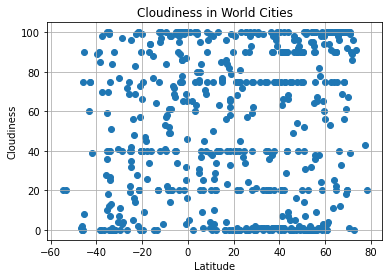

In [8]:
# Build a scatter plot for each data type Cloudiness (%) vs. Latitude
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CloudinessVsLatitude.png")

# Show plot
plt.show()

## Analysis:
The above plot is comparing cloudiness to latitude for multiple cities.There is no relation between cloudiness and latitude.

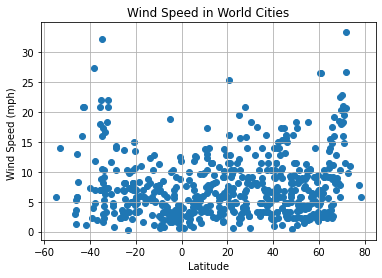

In [9]:
# Build a scatter plot for each data type Wind Speed (mph) vs. Latitude
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph) ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/WindSpeedVsLatitude.png")

# Show plot
plt.show()

## Analysis:
The above plot is comparing wind speed to latitude for multiple cities.There is no strong relation between wind speed and latitude.just that windspeeds are usally between 0 to 25 mph.

In [10]:
north_hemi_df = city_data_df.loc[(city_data_df["Latitude"]>=0)]
south_hemi_df = city_data_df.loc[(city_data_df["Latitude"]<0)]

In [11]:
def line_regress (x_values,y_values,annotate_x,annotate_y):
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create line equation string
    plt.plot(x_values,regress_values,"r-") 
    plt.annotate(line_eq,(annotate_x,annotate_y),fontsize=15,color="red") 
    print(line_eq)
    print(f"The r-squared is: {rvalue**2}")

y = 0.53x +82.1
The r-squared is: 0.4280283071599997


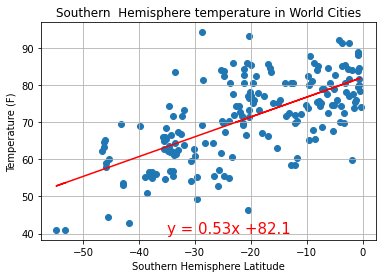

In [12]:
# Build a scatter plot for each data type Temperature vs. Southern Hemisphere
plt.scatter(south_hemi_df["Latitude"], south_hemi_df["Temperature"], marker="o")
# Incorporate the other graph properties
plt.title("Southern  Hemisphere temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Southern Hemisphere Latitude")
plt.grid(True)
line_regress (south_hemi_df["Latitude"], south_hemi_df["Temperature"],-35,40)
plt.savefig("Images/SouthernHemisphereVsTemperature.png")
plt.show()

y = -1.02x +92.74
The r-squared is: 0.8427039108470994


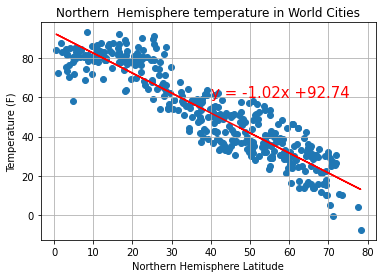

In [13]:
# Build a scatter plot for each data type Temperature vs. Northern Hemisphere
plt.scatter(north_hemi_df["Latitude"], north_hemi_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Northern  Hemisphere temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Northern Hemisphere Latitude")
plt.grid(True)
line_regress (north_hemi_df["Latitude"], north_hemi_df["Temperature"], 40, 60)
plt.savefig("Images/NorthernHemisphereVsTemperature.png")
plt.show()

## Analysis:
The above two plots are comparing temperature to both southern hemisphere latitude and northern hemisphere latitude for multiple cities. Northern hemisphere has strong correlation to temperature when compared to southern hemisphere latitude which is weak.

y = 0.34x +78.29
The r-squared is: 0.06694655410910355


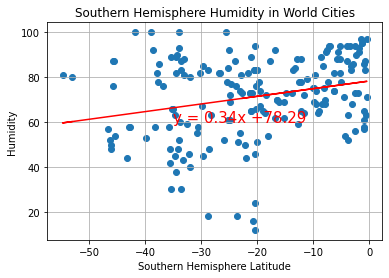

In [14]:
# Build a scatter plot for each data type Humidity vs. Northern Hemisphere
plt.scatter(south_hemi_df["Latitude"], south_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Southern Hemisphere Latitude")
plt.grid(True)
line_regress (south_hemi_df["Latitude"], south_hemi_df["Humidity"], -35,60)

plt.savefig("Images/SouthernHemisphereVsHumidity.png")
plt.show()

y = 0.31x +55.17
The r-squared is: 0.07533813943781861


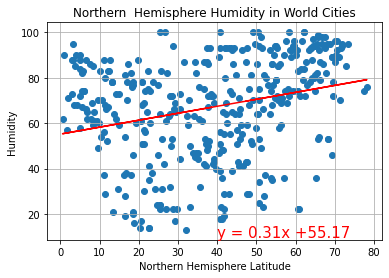

In [15]:
# Build a scatter plot for each data type Humidity vs. Northern Hemisphere
plt.scatter(north_hemi_df["Latitude"], north_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Northern  Hemisphere Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Northern Hemisphere Latitude")
plt.grid(True)
line_regress (north_hemi_df["Latitude"], north_hemi_df["Humidity"],40, 10)

plt.savefig("Images/NorthernHemisphereVsHumidity.png")
plt.show()

## Analysis:
The above two plots are comparing humidity to both southern hemisphere latitude and northern hemisphere latitude for multiple cities. There is no correlation between latitude and humidity as we observed above and it’s the same for both hemispheres none or very weak.

y = 0.88x +67.75
The r-squared is: 0.11357671655850113


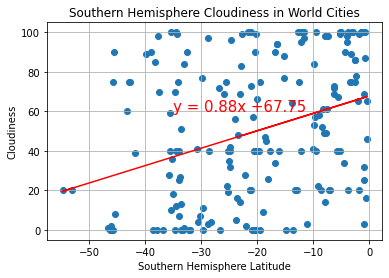

In [16]:
# Build a scatter plot for each data type Cloudiness vs. Southern Hemisphere
plt.scatter(south_hemi_df["Latitude"], south_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Southern Hemisphere Latitude")
plt.grid(True)
line_regress (south_hemi_df["Latitude"], south_hemi_df["Cloudiness"], -35,60)
plt.savefig("Images/SouthernHemisphereVsCloudiness.png")
plt.show()

y = 0.23x +41.51
The r-squared is: 0.014158555201074135


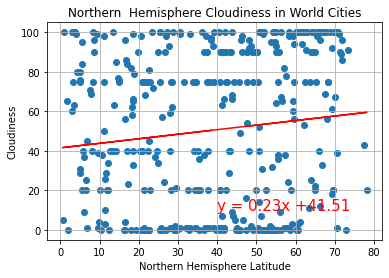

In [17]:
# Build a scatter plot for each data type Cloudiness vs. Northern Hemisphere
plt.scatter(north_hemi_df["Latitude"], north_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Northern  Hemisphere Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Northern Hemisphere Latitude")
plt.grid(True)
line_regress (north_hemi_df["Latitude"], north_hemi_df["Cloudiness"],40, 10)

plt.savefig("Images/NorthernHemisphereVsCloudiness.png")
plt.show()

## Analysis:
The above two plots are comparing cloudiness to both southern hemisphere latitude and northern hemisphere latitude for multiple cities. There is no correlation between latitude and cloudiness as we observed above and it’s the same for both hemispheres none or very weak.

y = -0.14x +4.12
The r-squared is: 0.12549669002981628


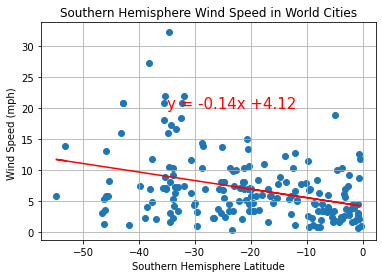

In [18]:
# Build a scatter plot for each data type Wind Speed vs. Southern Hemisphere
plt.scatter(south_hemi_df["Latitude"], south_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph) ")
plt.xlabel("Southern Hemisphere Latitude")
plt.grid(True)
line_regress (south_hemi_df["Latitude"], south_hemi_df["Wind Speed"], -35,20)

plt.savefig("Images/SouthernHemisphereVsWindSpeed.png")
plt.show()

y = 0.06x +5.6
The r-squared is: 0.0491514571322976


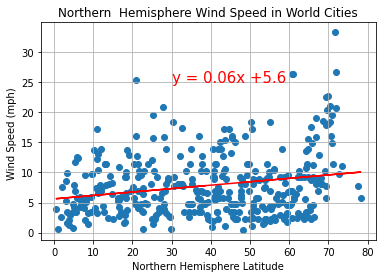

In [19]:
# Build a scatter plot for each data type Wind Speed vs. Northern Hemisphere
plt.scatter(north_hemi_df["Latitude"], north_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Northern  Hemisphere Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph) ")
plt.xlabel("Northern Hemisphere Latitude")
plt.grid(True)
line_regress (north_hemi_df["Latitude"], north_hemi_df["Wind Speed"],30,25)

plt.savefig("Images/NorthernHemisphereVsWindSpeed.png")
plt.show()

## Analysis:
The above two plots are comparing wind speed to both southern hemisphere latitude and northern hemisphere latitude for multiple cities. There is no correlation between latitude and wind speed as we observed above and it’s the same for both hemispheres none or very weak.